In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import sklearn 
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import catboost
import lightgbm
import xgboost
%pylab inline

Populating the interactive namespace from numpy and matplotlib


    Notes:
        - Is player team win team?
        - Check del temporarily
        - data_v1 with xgb = 0.768 

Info about data
----------------

In [4]:
data_test = pd.read_csv('data/dota2_csv/dota2_skill_test.csv',index_col='id')
data_train = pd.read_csv('data/dota2_csv/dota2_skill_train.csv',index_col='id')

data_train_v6_1 = pd.read_csv('data/data_train_v6_1.csv')
data_test_v6_1 = pd.read_csv('data/data_test_v6_1.csv')


abilities = pd.read_csv('data/dota2_csv/dota2_abilities.csv', index_col='ability_id')
heroes = pd.read_csv('data/dota2_csv/dota2_heroes.csv', index_col='hero_id')
items = pd.read_csv('data/dota2_csv/dota2_items.csv')

In [5]:
npc = data_train_v6_1[['npc_dota_creep_goodguys_ranged','npc_dota_neutral_forest_troll_berserker','npc_dota_goodguys_tower1_mid','npc_dota_hero_pangolier','npc_dota_goodguys_tower1_bot','npc_dota_neutral_polar_furbolg_ursa_warrior','npc_dota_hero_oracle','npc_dota_neutral_satyr_hellcaller','npc_dota_neutral_giant_wolf','npc_dota_goodguys_tower2_mid','npc_dota_neutral_satyr_soulstealer','npc_dota_creep_goodguys_melee','npc_dota_goodguys_tower1_top','npc_dota_neutral_centaur_khan','npc_dota_goodguys_tower2_bot','npc_dota_hero_skywrath_mage','npc_dota_neutral_forest_troll_high_priest','npc_dota_sentry_wards','npc_dota_goodguys_tower3_mid','npc_dota_goodguys_range_rax_mid','npc_dota_neutral_mud_golem','npc_dota_goodguys_melee_rax_mid','npc_dota_goodguys_healers','npc_dota_neutral_satyr_trickster','npc_dota_neutral_dark_troll_warlord','npc_dota_dark_troll_warlord_skeleton_warrior','npc_dota_neutral_dark_troll','npc_dota_hero_chaos_knight','npc_dota_goodguys_range_rax_bot','npc_dota_creep_badguys_ranged','npc_dota_neutral_mud_golem_split','npc_dota_goodguys_melee_rax_bot','npc_dota_neutral_polar_furbolg_champion','npc_dota_creep_badguys_melee','npc_dota_observer_wards','npc_dota_hero_earthshaker','npc_dota_neutral_alpha_wolf','npc_dota_goodguys_siege','npc_dota_hero_silencer','npc_dota_badguys_tower2_top','npc_dota_badguys_fort','npc_dota_hero_axe','npc_dota_badguys_siege','npc_dota_creep_goodguys_melee_upgraded','npc_dota_badguys_melee_rax_bot','npc_dota_badguys_range_rax_top','npc_dota_badguys_tower3_top','npc_dota_hero_tinker','npc_dota_badguys_tower4','npc_dota_hero_bounty_hunter','npc_dota_hero_ursa','npc_dota_badguys_tower1_bot','npc_dota_badguys_tower2_mid','npc_dota_roshan','npc_dota_juggernaut_healing_ward','npc_dota_hero_invoker','npc_dota_neutral_granite_golem','npc_dota_techies_land_mine','npc_dota_neutral_black_dragon','npc_dota_neutral_ogre_magi','npc_dota_badguys_tower2_bot','npc_dota_neutral_fel_beast','npc_dota_badguys_tower3_bot','npc_dota_badguys_melee_rax_mid','npc_dota_neutral_enraged_wildkin','npc_dota_hero_pudge','npc_dota_neutral_rock_golem','npc_dota_neutral_gnoll_assassin','npc_dota_invoker_forged_spirit','npc_dota_neutral_centaur_outrunner','npc_dota_badguys_range_rax_bot','npc_dota_neutral_black_drake','npc_dota_hero_juggernaut','npc_dota_badguys_tower1_mid','npc_dota_techies_stasis_trap','npc_dota_neutral_prowler_shaman','npc_dota_neutral_wildkin','npc_dota_neutral_prowler_acolyte','npc_dota_hero_techies','npc_dota_neutral_ogre_mauler','npc_dota_neutral_big_thunder_lizard','npc_dota_warlock_golem_2','npc_dota_warlock_golem_1','npc_dota_neutral_small_thunder_lizard','npc_dota_hero_lion','npc_dota_hero_warlock','npc_dota_hero_kunkka','npc_dota_hero_antimage','npc_dota_hero_viper','npc_dota_courier','npc_dota_hero_windrunner','npc_dota_creep_goodguys_ranged_upgraded','npc_dota_hero_terrorblade','npc_dota_hero_broodmother','npc_dota_hero_rattletrap','npc_dota_hero_abyssal_underlord','npc_dota_hero_grimstroke','npc_dota_hero_dragon_knight','npc_dota_grimstroke_ink_creature','npc_dota_badguys_fillers','npc_dota_hero_legion_commander','npc_dota_badguys_melee_rax_top','npc_dota_goodguys_tower4','npc_dota_hero_leshrac','npc_dota_goodguys_fort','npc_dota_hero_riki','npc_dota_goodguys_fillers','npc_dota_hero_mars','npc_dota_neutral_harpy_scout','npc_dota_hero_bloodseeker','npc_dota_hero_dark_willow','npc_dota_hero_vengefulspirit','npc_dota_neutral_harpy_storm','npc_dota_hero_ogre_magi','npc_dota_hero_luna','npc_dota_hero_abaddon','npc_dota_badguys_healers','npc_dota_badguys_range_rax_mid','npc_dota_badguys_tower3_mid','npc_dota_hero_morphling','npc_dota_hero_nevermore','npc_dota_hero_sven','npc_dota_hero_life_stealer','npc_dota_hero_phantom_assassin','npc_dota_hero_keeper_of_the_light','npc_dota_hero_troll_warlord','npc_dota_badguys_tower1_top','npc_dota_hero_ember_spirit','npc_dota_hero_spirit_breaker','npc_dota_hero_pugna','npc_dota_shadow_shaman_ward_2','npc_dota_shadow_shaman_ward_1','npc_dota_hero_necrolyte','npc_dota_hero_shadow_shaman','npc_dota_lycan_wolf4','npc_dota_hero_clinkz','npc_dota_necronomicon_warrior_3','npc_dota_lycan_wolf3','npc_dota_necronomicon_archer_1','npc_dota_lycan_wolf2','npc_dota_hero_lycan','npc_dota_necronomicon_archer_3','npc_dota_necronomicon_warrior_1','npc_dota_lycan_wolf1','npc_dota_goodguys_tower3_top','npc_dota_brewmaster_storm_2','npc_dota_brewmaster_fire_3','npc_dota_hero_brewmaster','npc_dota_neutral_kobold_taskmaster','npc_dota_brewmaster_storm_1','npc_dota_brewmaster_fire_2','npc_dota_goodguys_tower2_top','npc_dota_goodguys_tower3_bot','npc_dota_brewmaster_storm_3','npc_dota_goodguys_melee_rax_top','npc_dota_brewmaster_earth_3','npc_dota_brewmaster_fire_1','npc_dota_neutral_kobold_tunneler','npc_dota_hero_magnataur','npc_dota_neutral_kobold','npc_dota_hero_bristleback','npc_dota_hero_sniper','npc_dota_hero_lich','npc_dota_hero_huskar','npc_dota_goodguys_range_rax_top','npc_dota_hero_monkey_king','npc_dota_hero_earth_spirit','npc_dota_hero_crystal_maiden','npc_dota_shadow_shaman_ward_3','npc_dota_hero_rubick','npc_dota_creep_goodguys_melee_upgraded_mega','npc_dota_goodguys_siege_upgraded','npc_dota_hero_venomancer','npc_dota_neutral_ghost','npc_dota_venomancer_plague_ward_1','npc_dota_venomancer_plague_ward_4','npc_dota_venomancer_plague_ward_3','npc_dota_venomancer_plague_ward_2','npc_dota_hero_mirana','npc_dota_hero_lina','npc_dota_hero_phantom_lancer','npc_dota_hero_spectre','npc_dota_hero_jakiro','npc_dota_hero_witch_doctor','npc_dota_hero_storm_spirit','npc_dota_hero_tiny','npc_dota_hero_tidehunter','npc_dota_hero_treant','npc_dota_hero_arc_warden','npc_dota_hero_faceless_void','npc_dota_hero_disruptor','npc_dota_hero_bane','npc_dota_hero_drow_ranger','npc_dota_hero_night_stalker','npc_dota_hero_dazzle','npc_dota_furion_treant_3','npc_dota_furion_treant_2','npc_dota_hero_furion','npc_dota_furion_treant_1','npc_dota_furion_treant_4','npc_dota_creep_badguys_melee_upgraded_mega','npc_dota_creep_badguys_ranged_upgraded','npc_dota_creep_badguys_melee_upgraded','npc_dota_badguys_siege_upgraded_mega','npc_dota_creep_badguys_ranged_upgraded_mega','npc_dota_hero_centaur','npc_dota_hero_medusa','npc_dota_techies_remote_mine','npc_dota_hero_razor','npc_dota_hero_slardar','npc_dota_hero_enigma','npc_dota_eidolon','npc_dota_lesser_eidolon','npc_dota_greater_eidolon','npc_dota_dire_eidolon','npc_dota_hero_doom_bringer','npc_dota_hero_slark','npc_dota_hero_obsidian_destroyer','npc_dota_hero_ancient_apparition','npc_dota_badguys_siege_upgraded','npc_dota_hero_wisp','npc_dota_unit_undying_zombie_torso','npc_dota_hero_undying','npc_dota_clinkz_skeleton_archer','npc_dota_hero_weaver','npc_dota_hero_meepo','npc_dota_weaver_swarm','npc_dota_hero_zuus','npc_dota_hero_alchemist','npc_dota_visage_familiar1','npc_dota_visage_familiar3','npc_dota_hero_visage','npc_dota_visage_familiar2','npc_dota_creep_goodguys_ranged_upgraded_mega','npc_dota_goodguys_siege_upgraded_mega','npc_dota_hero_winter_wyvern','npc_dota_hero_gyrocopter','npc_dota_necronomicon_warrior_2','npc_dota_hero_shredder','npc_dota_hero_skeleton_king','npc_dota_wraith_king_skeleton_warrior','npc_dota_hero_sand_king','npc_dota_zeus_cloud','npc_dota_unit_tombstone2','npc_dota_unit_undying_zombie','npc_dota_unit_tombstone4','npc_dota_lone_druid_bear2','npc_dota_lone_druid_bear1','npc_dota_lone_druid_bear4','npc_dota_hero_lone_druid','npc_dota_lone_druid_bear3','npc_dota_hero_templar_assassin','npc_dota_templar_assassin_psionic_trap','npc_dota_unit_tombstone3','npc_dota_hero_tusk','npc_dota_gyrocopter_homing_missile','npc_dota_hero_queenofpain','npc_dota_phoenix_sun','npc_dota_hero_phoenix','npc_dota_hero_enchantress','npc_dota_hero_dark_seer','npc_dota_broodmother_spiderite','npc_dota_broodmother_spiderling','npc_dota_hero_nyx_assassin','npc_dota_hero_omniknight','npc_dota_hero_batrider','npc_dota_warlock_golem_scepter_2','npc_dota_brewmaster_earth_1','npc_dota_warlock_golem_3','npc_dota_warlock_golem_scepter_3','npc_dota_pugna_nether_ward_1','npc_dota_pugna_nether_ward_4','npc_dota_hero_naga_siren','npc_dota_hero_elder_titan','npc_dota_hero_puck','npc_dota_hero_death_prophet','npc_dota_hero_chen','npc_dota_hero_shadow_demon','npc_dota_beastmaster_boar_4','npc_dota_hero_beastmaster','npc_dota_beastmaster_boar_3','npc_dota_beastmaster_hawk_4','npc_dota_necronomicon_archer_2','npc_dota_pugna_nether_ward_3','npc_dota_beastmaster_boar_1','npc_dota_unit_tombstone1','npc_dota_neutral_mud_golem_split_doom','npc_dota_brewmaster_earth_2','npc_dota_beastmaster_boar_2','npc_dota_beastmaster_hawk_3','npc_dota_pugna_nether_ward_2','npc_dota_ignis_fatuus','npc_dota_furion_treant_large','npc_dota_beastmaster_hawk_2','npc_dota_beastmaster_hawk_1','npc_dota_warlock_golem_scepter_1','npc_dota_earth_spirit_stone']]

In [1]:
#('категория')['вещественный']
#data_train[data_train['hero_id'] == 5]['avg_gpm_x16'].mean()
data_train.groupby('hero_id')['avg_gpm_x16'].mean()

NameError: name 'data_train' is not defined

In [82]:
#частота категориального признака
data_train['hero_id'].map(data_train['hero_id'].value_counts())

id
7          301
8         1293
12         798
13        3137
14        3074
15         329
19        2710
23         486
25        2154
26         668
29        1293
30        3074
31        2710
34        1235
38         971
39        2673
40        2673
41         654
44         668
45         849
46         971
49         787
54         710
56         625
57         632
59         345
60         388
61        2538
63        1664
64         706
          ... 
193361    1005
193362    1293
193364     811
193365     360
193366     677
193368    3074
193370     792
193371    1008
193373     274
193374     576
193378     345
193379     808
193380     681
193381     654
193382     723
193383    1004
193384    1635
193385    1701
193387     888
193390    1093
193396    3074
193397    2154
193398    2710
193399     486
193400     672
193401    1451
193403     910
193404     623
193407     774
193409    1259
Name: hero_id, Length: 99871, dtype: int64

#### avg_kills_x16, avg_deaths_x16, avg_assists_x16, avg_gpm_x16, avg_xpm_x16

#### best_kills_x16, best_assists_x16, best_gpm_x16, best_xpm_x16

#### win_streak, best_win_streak

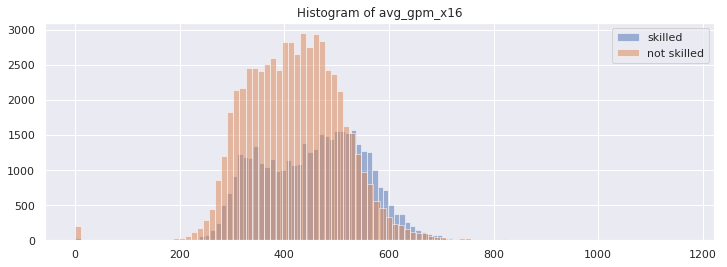

In [40]:
selected_column = 'avg_gpm_x16'
#threshold = 530

figure(figsize=(12, 4))
data_train.loc[data_train.skilled == 1, selected_column].hist(bins=100, alpha=0.5)
data_train.loc[data_train.skilled == 0, selected_column].hist(bins=100, alpha=0.5)
legend(['skilled', 'not skilled'])
#plot([threshold, threshold], [0, 2000])
_ = title('Histogram of {}'.format(selected_column))

<hr>

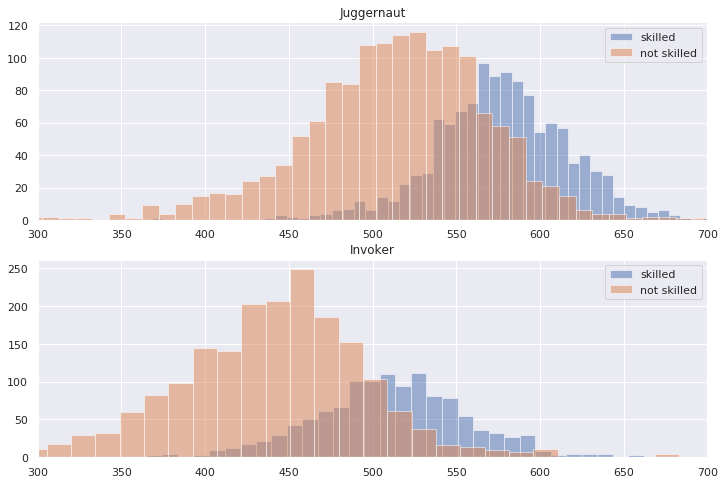

In [47]:
selected_heroes = [(8, 'Juggernaut'), (74, 'Invoker')]

selected_column = 'avg_gpm_x16'

figure(figsize=(12, 8))
for i, (selected_hero, hero_name) in enumerate(selected_heroes):
    subplot(len(selected_heroes), 1, i+1)
    data_train.loc[(data_train.skilled == 1) & (data_train.hero_id == selected_hero), selected_column].hist(bins=50, alpha=0.5)
    data_train.loc[(data_train.skilled == 0) & (data_train.hero_id == selected_hero), selected_column].hist(bins=50, alpha=0.5)
    xlim([300, 700])
    legend(['skilled', 'not skilled'])
    title(hero_name)

<hr>

In [57]:
selected_heroes = []
for i, n in zip(heroes.index,heroes.localized_name):
    selected_heroes.append((i,n))

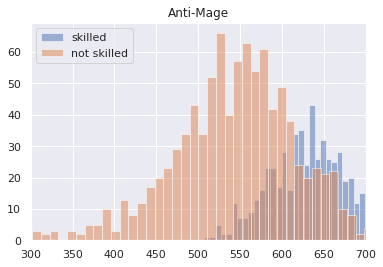

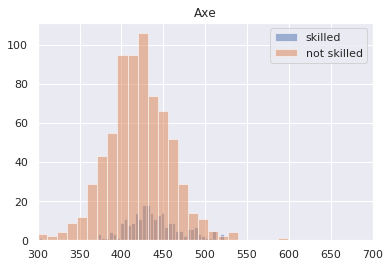

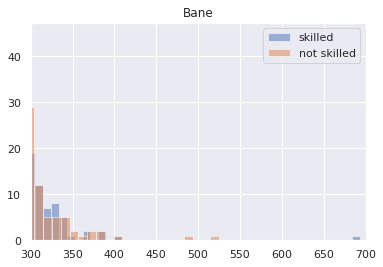

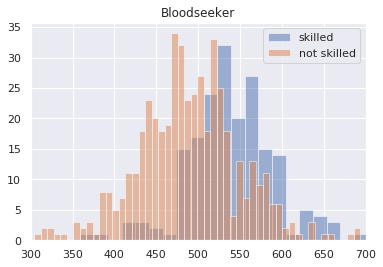

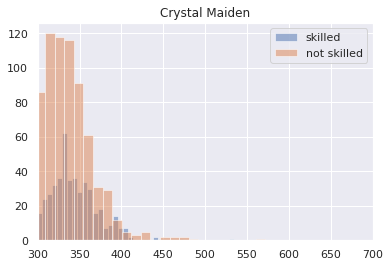

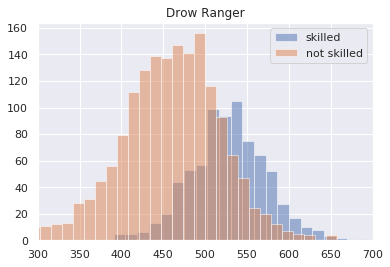

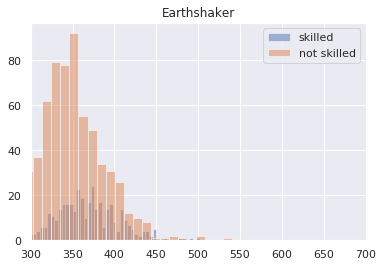

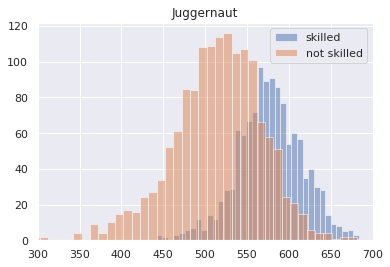

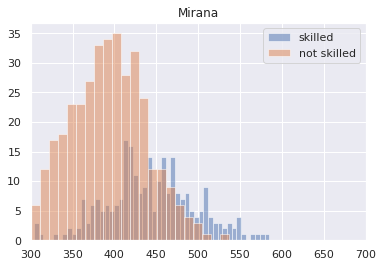

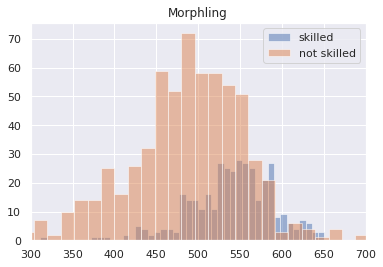

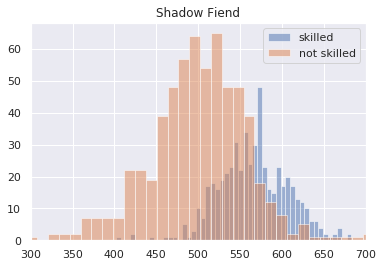

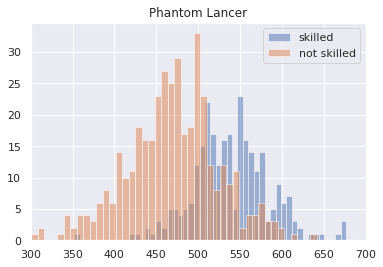

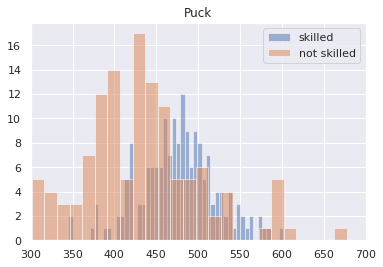

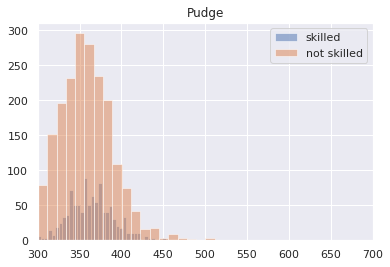

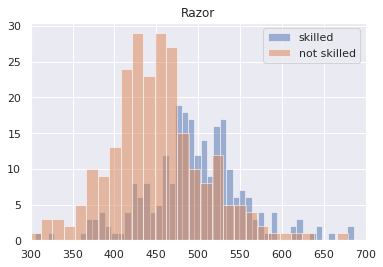

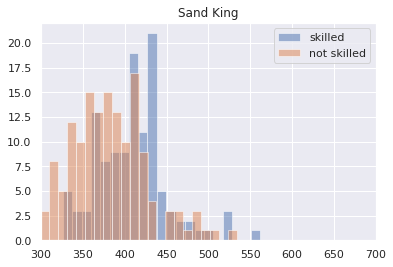

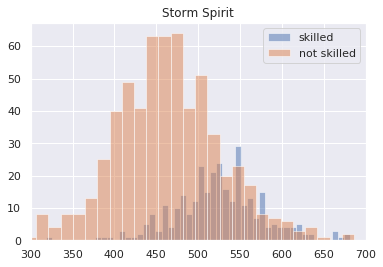

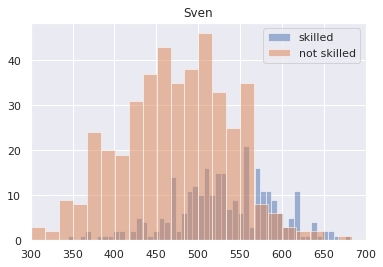

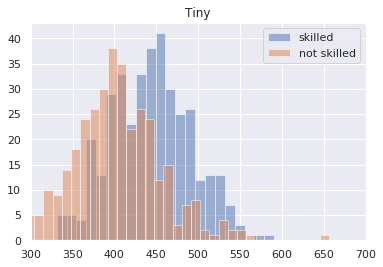

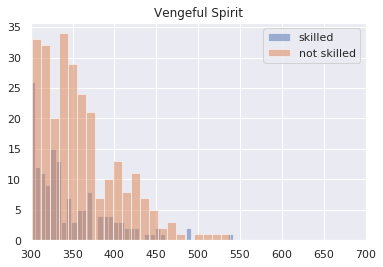

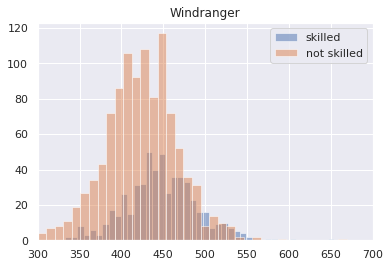

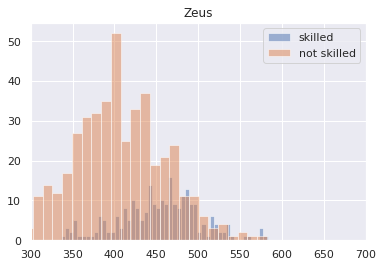

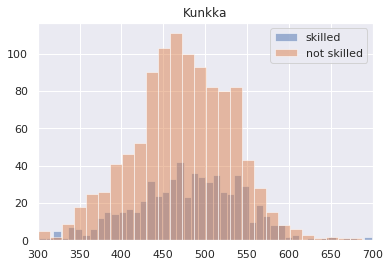

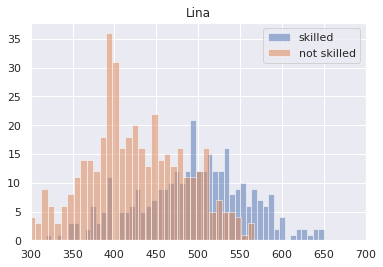

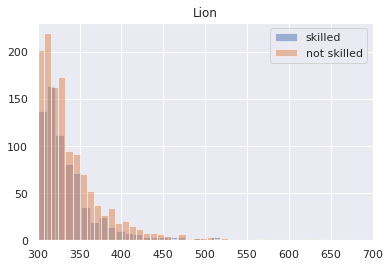

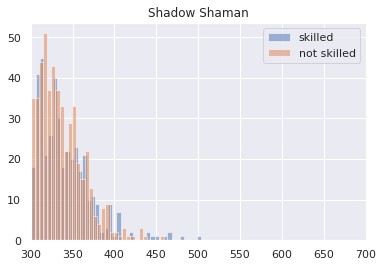

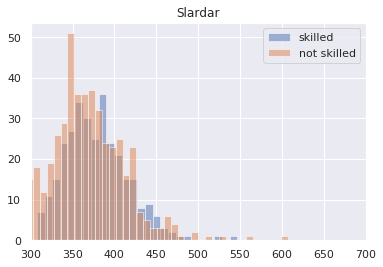

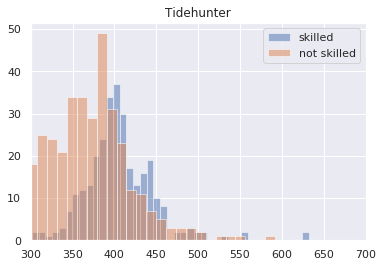

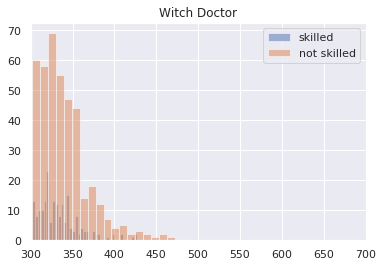

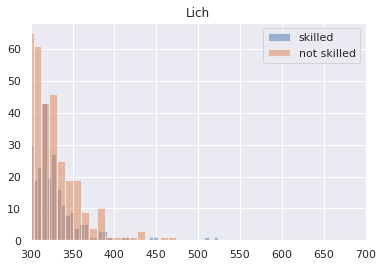

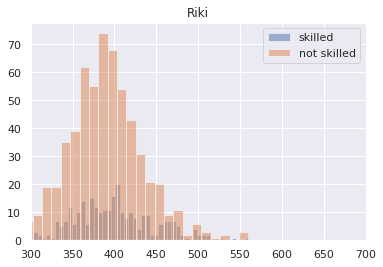

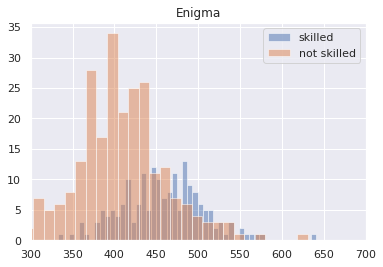

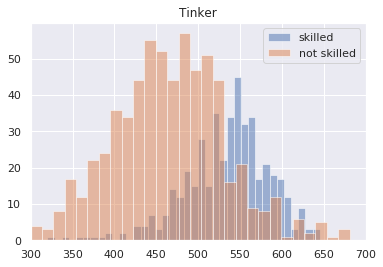

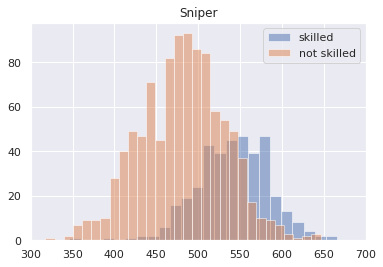

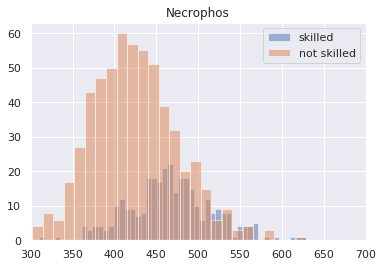

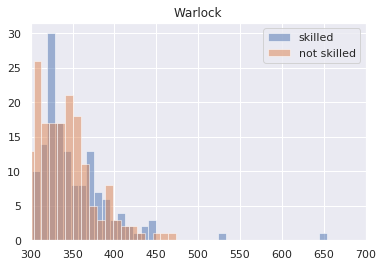

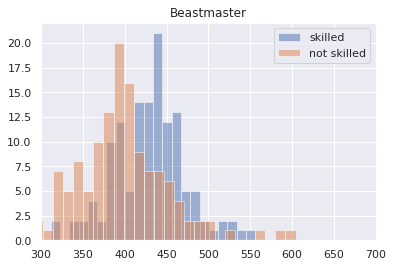

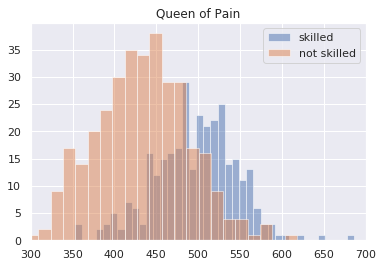

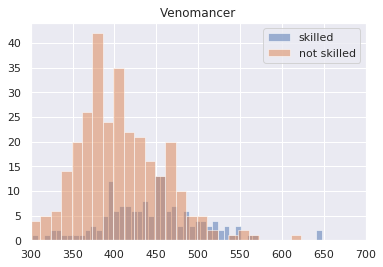

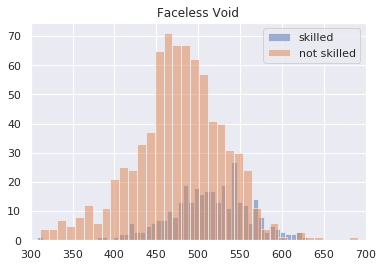

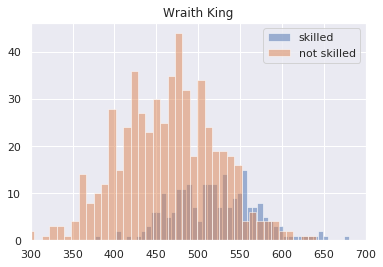

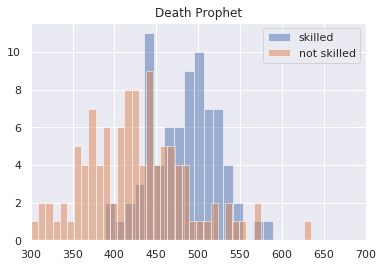

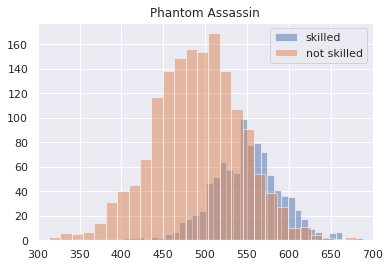

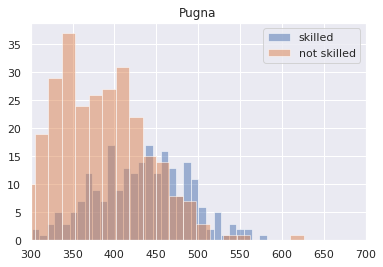

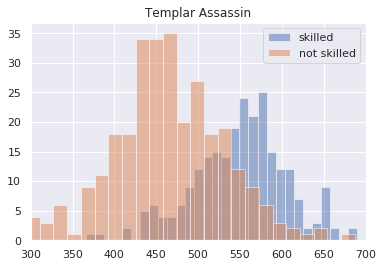

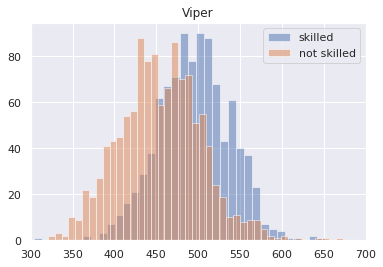

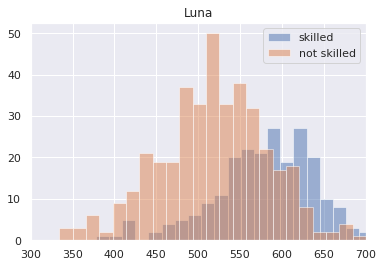

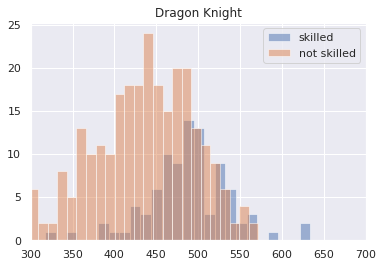

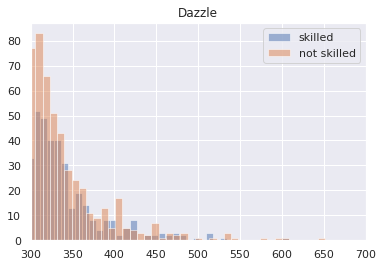

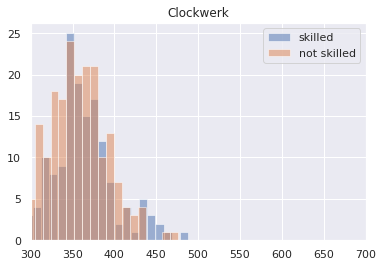

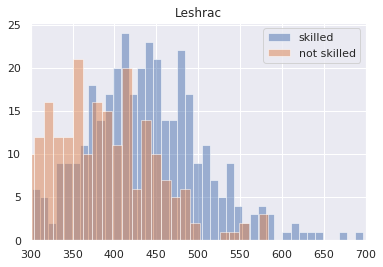

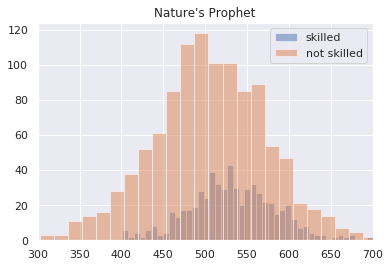

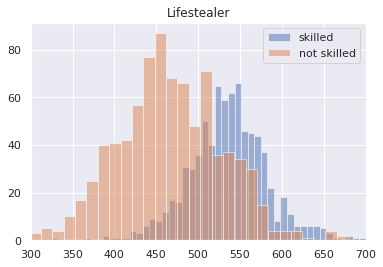

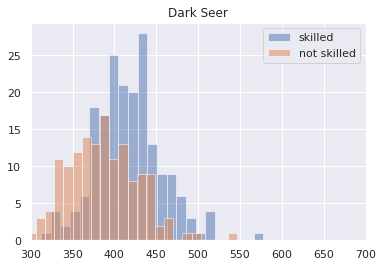

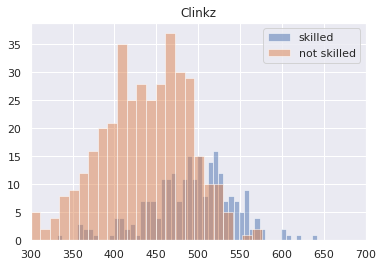

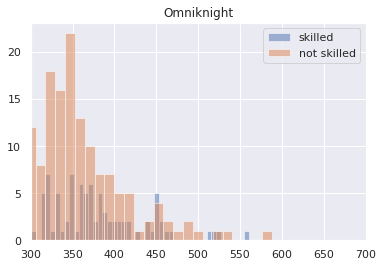

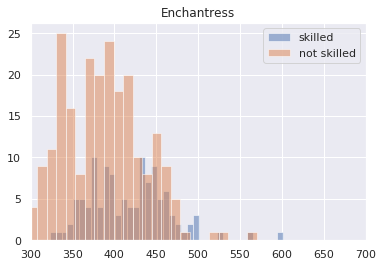

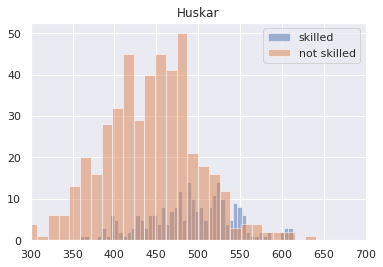

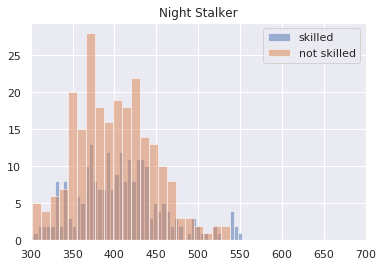

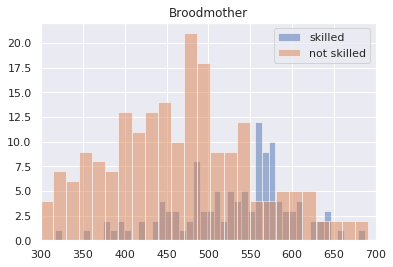

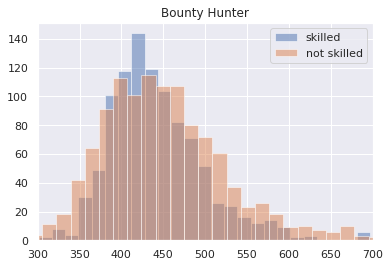

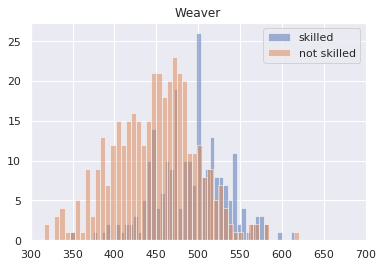

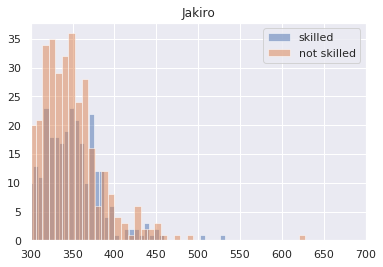

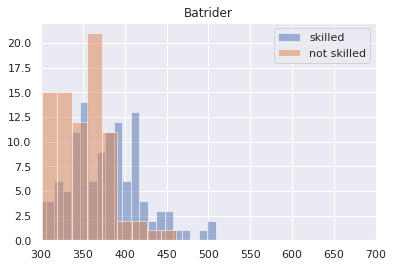

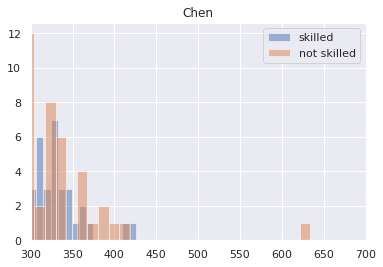

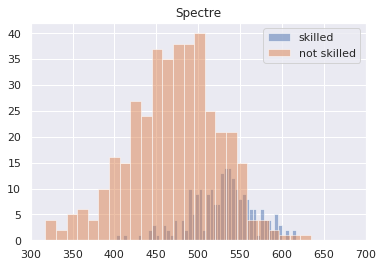

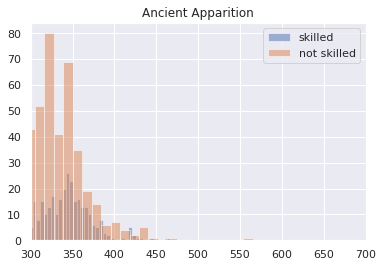

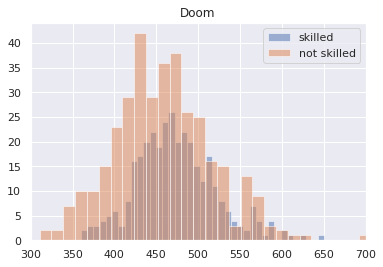

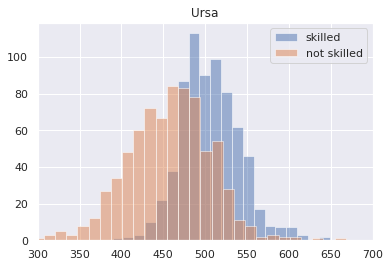

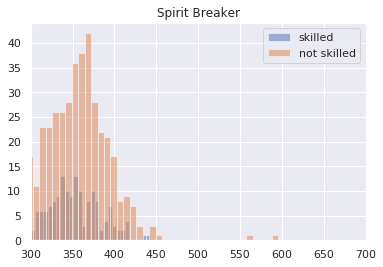

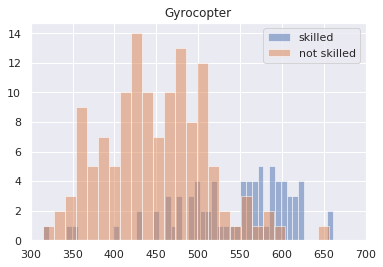

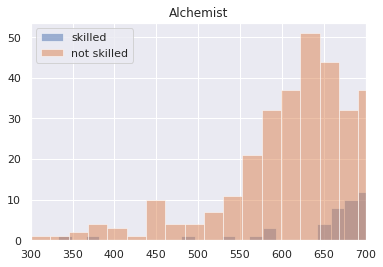

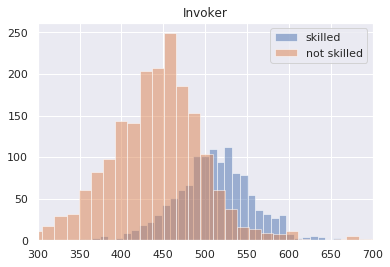

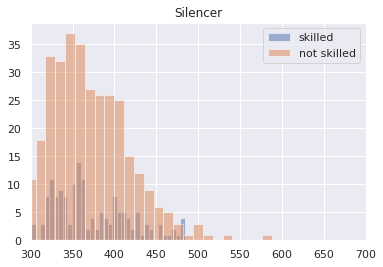

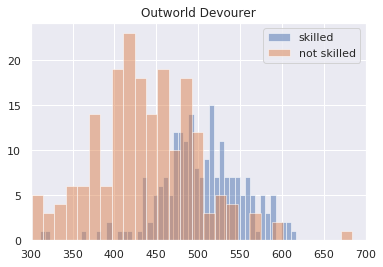

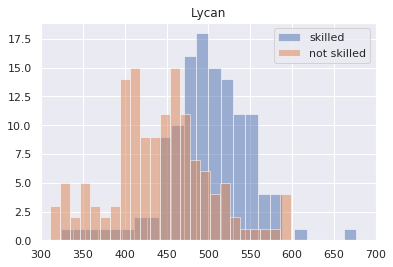

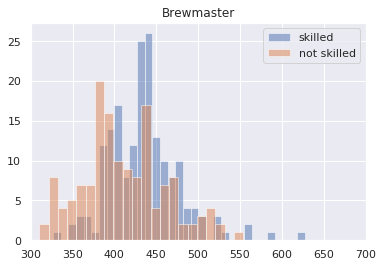

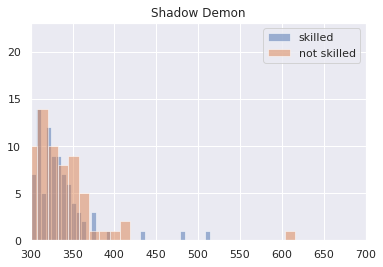

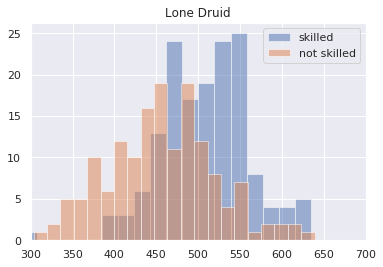

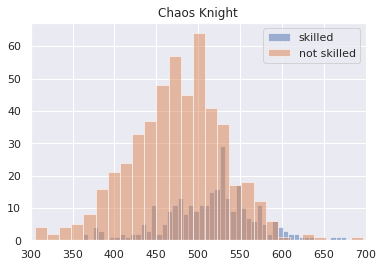

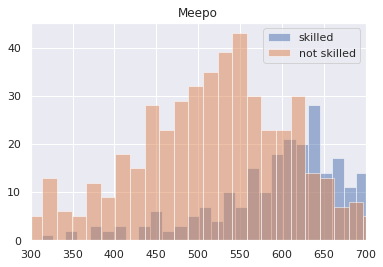

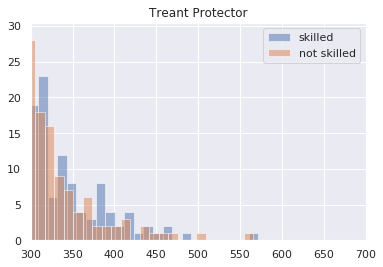

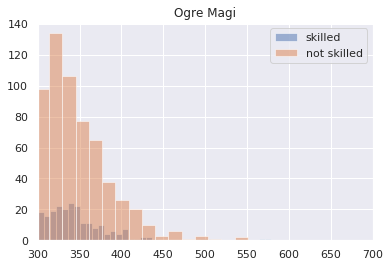

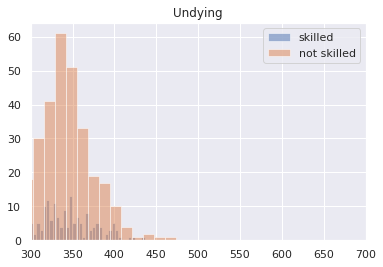

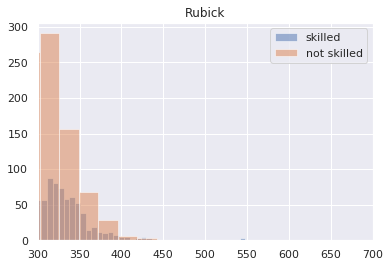

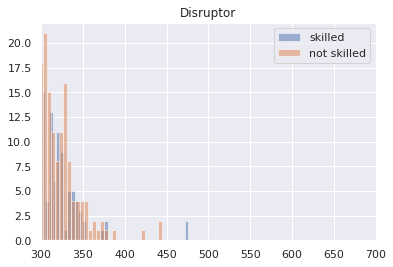

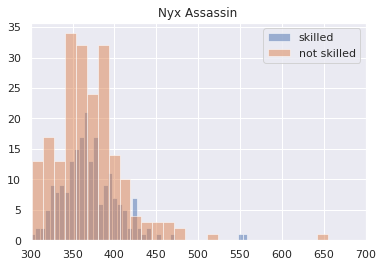

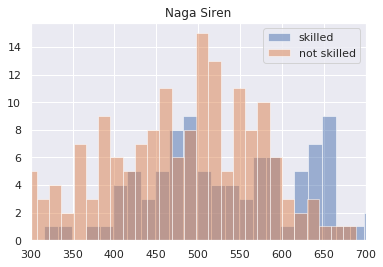

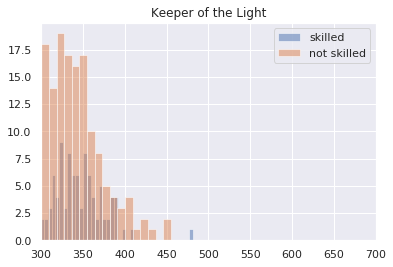

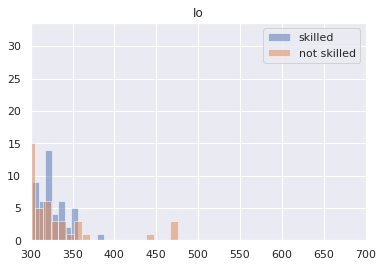

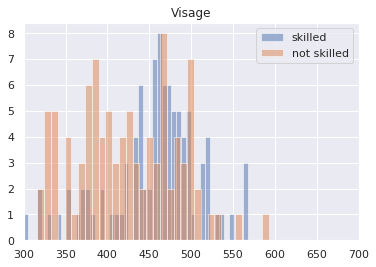

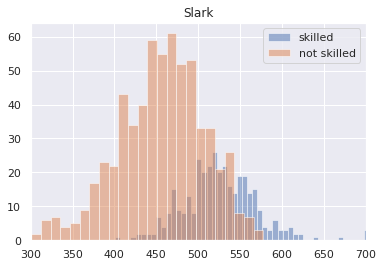

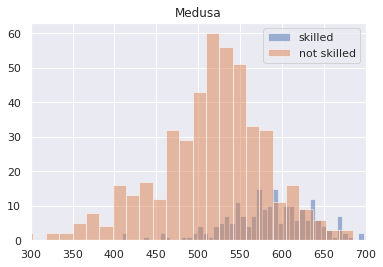

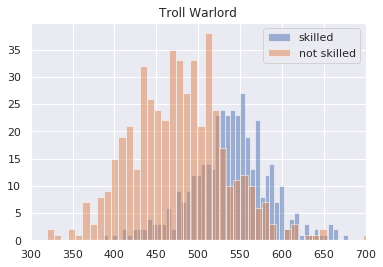

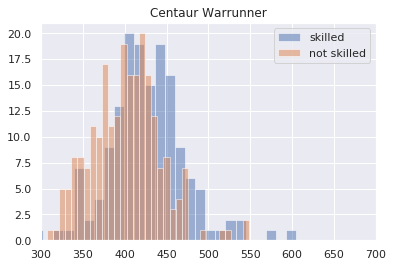

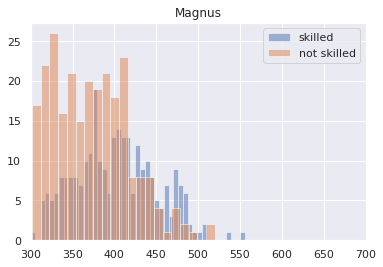

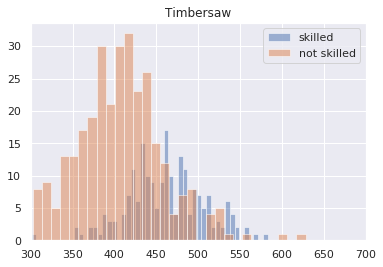

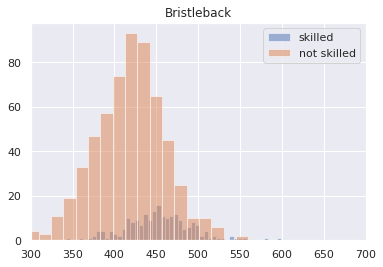

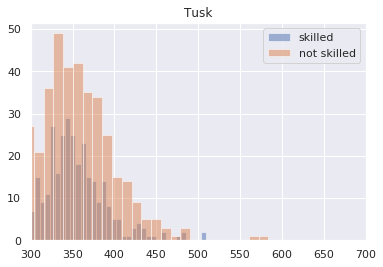

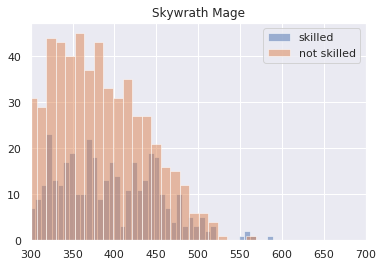

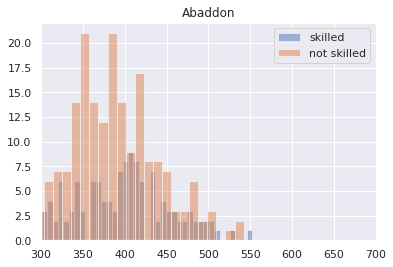

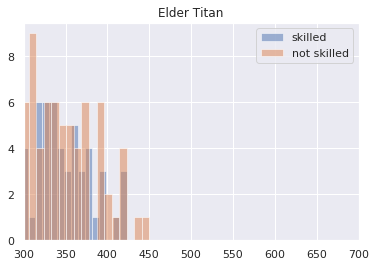

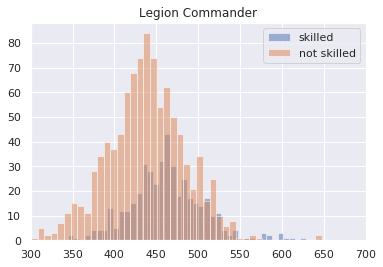

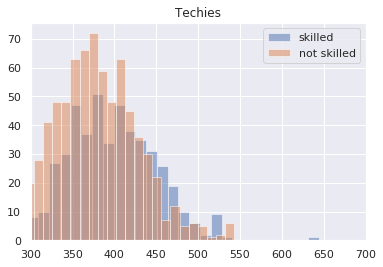

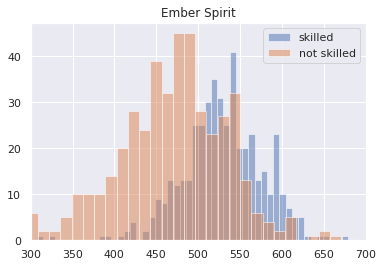

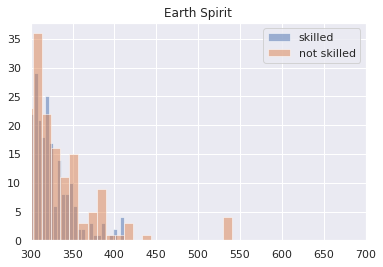

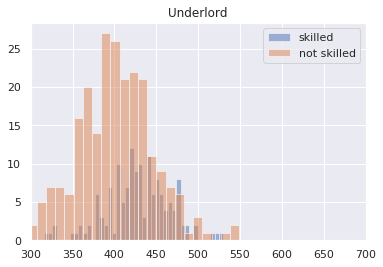

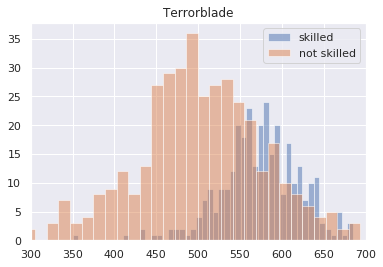

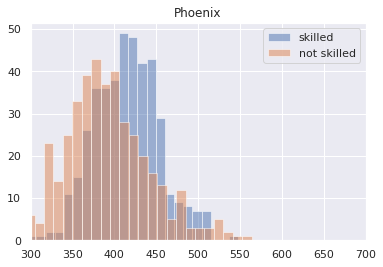

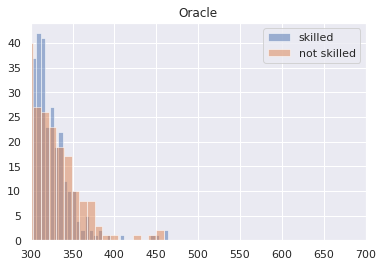

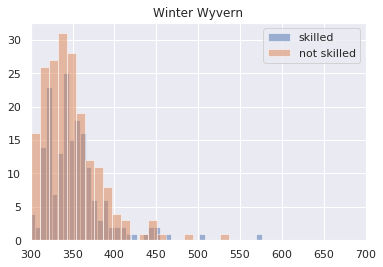

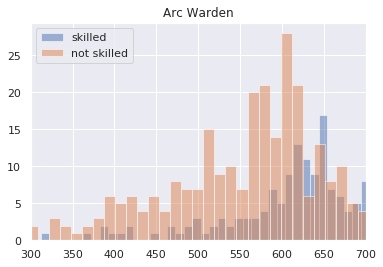

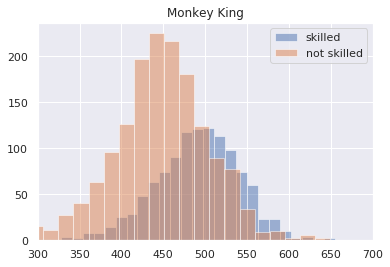

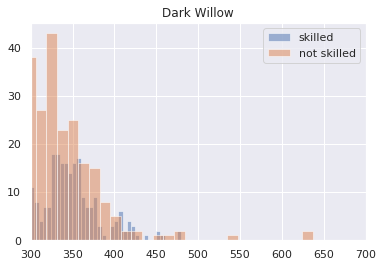

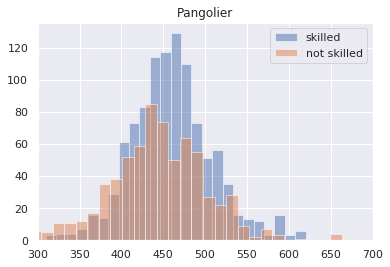

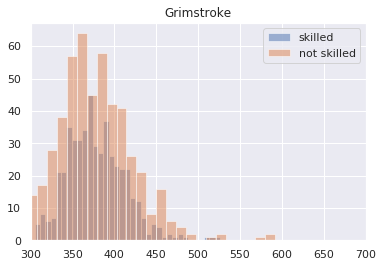

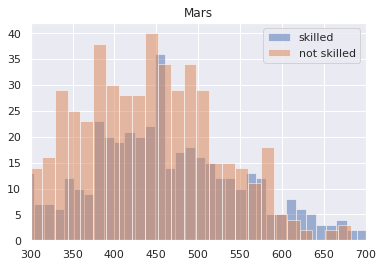

In [68]:
def pl(selected_heroes, hero_name):
    data_train.loc[(data_train.skilled == 1) & (data_train.hero_id == selected_hero), selected_column].hist(bins=50, alpha=0.5)
    data_train.loc[(data_train.skilled == 0) & (data_train.hero_id == selected_hero), selected_column].hist(bins=50, alpha=0.5)
    xlim([300, 700])
    legend(['skilled', 'not skilled'])
    title(hero_name)
    plt.show()
    
for selected_hero, hero_name in selected_heroes:
    pl(selected_hero, hero_name)